<a href="https://colab.research.google.com/github/21Karpi/pruebaBHhck2022/blob/main/Redes_neuronales_convolucionales_N%C3%BAmeros_Modo_3_RNC_con_Aumento_de_Datos_y_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# BHhackathon 2022 Team C Categorizate
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
from tensorflow.keras.utils import to_categorical

#Cargar los datos de MNIST
(X_entrenamiento, Y_entrenamiento), (X_pruebas, Y_pruebas) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [2]:
#Colocacion de datos blanco y negro
X_entrenamiento = X_entrenamiento.reshape(X_entrenamiento.shape[0], 28, 28, 1)
X_pruebas = X_pruebas.reshape(X_pruebas.shape[0], 28, 28, 1)

#One-hot encoding
Y_entrenamiento = to_categorical(Y_entrenamiento)
Y_pruebas = to_categorical(Y_pruebas)

#Convertir a flotante y normalizar para que aprenda mejor la red
X_entrenamiento = X_entrenamiento.astype('float32') / 255
X_pruebas = X_pruebas.astype('float32') / 255

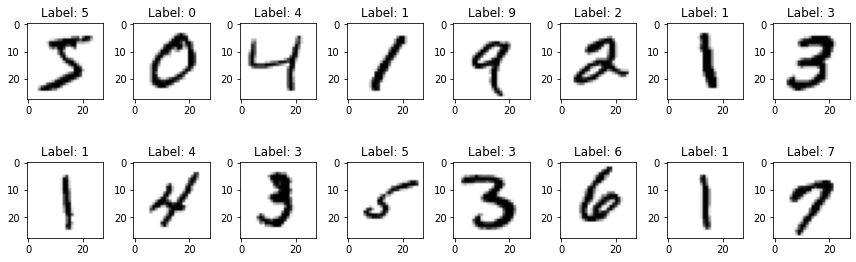

In [3]:
#Codigo para mostrar imagenes del set, no es necesario ejecutarlo, solo imprime unos numeros :)
import matplotlib.pyplot as plt
filas = 2
columnas = 8
num = filas*columnas
imagenes = X_entrenamiento[0:num]
etiquetas = Y_entrenamiento[0:num]
fig, axes = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
for i in range(num):
     ax = axes[i//columnas, i%columnas]
     ax.imshow(imagenes[i].reshape(28,28), cmap='gray_r')
     ax.set_title('Label: {}'.format(np.argmax(etiquetas[i])))
plt.tight_layout()
plt.show()

In [4]:
#ImageDataGenerator

from tensorflow.keras.preprocessing.image import ImageDataGenerator

rango_rotacion = 30
mov_ancho = 0.25
mov_alto = 0.25

#Rango de inclinacion para determinar mejor la escritura de los numeros
rango_acercamiento=[0.5,1.5]

datagen = ImageDataGenerator(
    rotation_range = rango_rotacion,
    width_shift_range = mov_ancho,
    height_shift_range = mov_alto,
    zoom_range=rango_acercamiento,
    #shear_range=rango_inclinacion #No uso este de momento pero si quieres puedes probar usandolo!
)

datagen.fit(X_entrenamiento)

In [ ]:
  #Codigo para mostrar imagenes del set, solo imprime como se ven antes y despues de las transformaciones
  filas = 4
  columnas = 8
  num = filas*columnas
  print('ANTES:\n')
  fig1, axes1 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
  for i in range(num):
      ax = axes1[i//columnas, i%columnas]
      ax.imshow(X_entrenamiento[i].reshape(28,28), cmap='gray_r')
      ax.set_title('Label: {}'.format(np.argmax(Y_entrenamiento[i])))
  plt.tight_layout()
  plt.show()
  print('DESPUES:\n')
  fig2, axes2 = plt.subplots(filas, columnas, figsize=(1.5*columnas,2*filas))
  for X, Y in datagen.flow(X_entrenamiento,Y_entrenamiento.reshape(Y_entrenamiento.shape[0], 10),batch_size=num,shuffle=False):
      for i in range(0, num):
            ax = axes2[i//columnas, i%columnas]
            ax.imshow(X[i].reshape(28,28), cmap='gray_r')
            ax.set_title('Label: {}'.format(int(np.argmax(Y[i]))))
      break
  plt.tight_layout()
  plt.show()

In [5]:
#Modelo
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
])

#Compilación
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#Los datos para entrenar saldran a manera que sean generados con las transformaciones que indicamos
data_gen_entrenamiento = datagen.flow(X_entrenamiento, Y_entrenamiento, batch_size=32)

In [8]:
TAMANO_LOTE = 32

print("Wait. Training Model");
epocas=60
history = modelo.fit(
    data_gen_entrenamiento,
    epochs=epocas,
    batch_size=TAMANO_LOTE,
    validation_data=(X_pruebas, Y_pruebas),
    steps_per_epoch=int(np.ceil(60000 / float(TAMANO_LOTE))),
    validation_steps=int(np.ceil(10000 / float(TAMANO_LOTE)))
)

print("Modelo entrenado!");

Wait. Training Model
Epoch 1/60
1875/1875 [==============================] - 44s 18ms/step - loss: 1.2238 - accuracy: 0.5896 - val_loss: 0.1894 - val_accuracy: 0.9510
Epoch 2/60
1875/1875 [==============================] - 33s 18ms/step - loss: 0.7050 - accuracy: 0.7727 - val_loss: 0.1239 - val_accuracy: 0.9663
Epoch 3/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.6050 - accuracy: 0.8056 - val_loss: 0.1028 - val_accuracy: 0.9686
Epoch 4/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.5320 - accuracy: 0.8293 - val_loss: 0.0857 - val_accuracy: 0.9731
Epoch 5/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4901 - accuracy: 0.8419 - val_loss: 0.0898 - val_accuracy: 0.9717
Epoch 6/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4644 - accuracy: 0.8508 - val_loss: 0.0722 - val_accuracy: 0.9783
Epoch 7/60
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4438 - accuracy: 0.8583

In [9]:

modelo.save('numeros_conv_ad_do.h5')

#Convertirlo a tensorflow.js
!pip install tensorflowjs

!mkdir carpeta_salida

!tensorflowjs_converter --input_format keras numeros_conv_ad_do.h5 carpeta_salida

     |████████████████████████████████| 77 kB 2.9 MB/s 
     |████████████████████████████████| 462 kB 11.1 MB/s 
